# 1. Mengimpor Library

Pada tahap ini, kita mengimpor seluruh library yang diperlukan, seperti numpy, pandas, seaborn, matplotlib, dan sklearn.

In [1]:
import textwrap
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, classification_report

# Data Loading

Selanjutnya, kita melihat isi dari dataset secara sekilas dengan `.head()` dan ukuran dari dataset dengan `.shape`

In [2]:
data = pd.read_csv("/content/ObesityDataSet.csv")

# Menampilkan ukuran data
print(data.shape)

# Melihat 5 baris pertama data
data.head()

(2111, 17)


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


Dari hasil di atas, diperoleh dataset tersebut memiliki 2111 baris dan 17 kolom.

# Deskripsi Variabel

## Arti Variabel

Berikut adalah arti dari variabel-variabel pada dataset tersebut.

Variabel | Keterangan
----------|----------
Gender | Jenis kelamin responden (laki-laki atau perempuan)
Age | Usia responden
Height | Tinggi responden (dalam satuan meter)
Weight | Berat responden (dalam satuan kilogram)
family_history_with_overweight | Apakah terdapat anggota keluarga responden yang juga terkena obesitas
FAVC | Apakah responden mengonsumsi makanan berkalori tinggi
FCVC | Frekuensi konsumsi sayur-sayuran dalam sehari
NCP | Frekuensi konsumsi makanan berat dalam sehari
CAEC | Konsumsi makanan di antara makan berat
SMOKE | Apakah responden merupakan perokok atau tidak
CH2O | Frekuensi Konsumsi air dalam sehari (dalam satuan liter)
SCC	| Apakah responden memantau asupan kalori
FAF	| Frekuensi aktivitas fisik dalam seminggu (0 = Tidak pernah, 1 = 1-2 hari, 2 = 3-4 hari, 3 = 5-6 hari)
TUE	| Waktu pemakaian gadget dalam sehari (0 = 0-3 jam, 1 = 4-6 jam, 2 = 6+ jam)
CALC | Frekuensi konsumsi alkohol
MTRANS | Jenis transportasi yang digunakan
NObeyesdad | Tingkat obesitas responden

## Memeriksa Tipe Variabel Beserta Jumlah

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

Dapat dilihat bahwa terdapat 8 variabel bertipe `float64` dan 9 variabel bertipe `object`.

## Menampilkan Deskripsi Statistik dari Data

In [4]:
data.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


Dari hasil tersebut, dapat disimpulkan bahwa responden memiliki rentang usia 14-61 tahun dengan tinggi rentang 1.45-1.98 meter dan berat rentang 39-173 kilogram.

# Data Cleaning

## Memeriksa Nilai yang Kosong pada Data

In [5]:
pd.DataFrame({'Nilai yang Kosong':data.isnull().sum()})

,Nilai yang Kosong
Gender,0
Age,0
Height,0
Weight,0
family_history_with_overweight,0
FAVC,0
FCVC,0
NCP,0
CAEC,0
SMOKE,0


Dari hasil di atas, tidak ada variabel yang memiliki nilai `null` atau kosong.

## Memeriksa Duplikasi Data

In [6]:
data.duplicated().sum()

24

Terlihat bahwa terdapat 24 duplikasi data pada data ini. Akan diperiksa apakah duplikasi data ini perlu diperbaiki atau dihapus.

In [7]:
# Menampilkan data duplikat
data[data.duplicated]

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
98,Female,21.0,1.52,42.0,no,no,3.0,1.0,Frequently,no,1.0,no,0.0,0.0,Sometimes,Public_Transportation,Insufficient_Weight
106,Female,25.0,1.57,55.0,no,yes,2.0,1.0,Sometimes,no,2.0,no,2.0,0.0,Sometimes,Public_Transportation,Normal_Weight
174,Male,21.0,1.62,70.0,no,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,Sometimes,Public_Transportation,Overweight_Level_I
179,Male,21.0,1.62,70.0,no,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,Sometimes,Public_Transportation,Overweight_Level_I
184,Male,21.0,1.62,70.0,no,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,Sometimes,Public_Transportation,Overweight_Level_I
209,Female,22.0,1.69,65.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Sometimes,Public_Transportation,Normal_Weight
309,Female,16.0,1.66,58.0,no,no,2.0,1.0,Sometimes,no,1.0,no,0.0,1.0,no,Walking,Normal_Weight
460,Female,18.0,1.62,55.0,yes,yes,2.0,3.0,Frequently,no,1.0,no,1.0,1.0,no,Public_Transportation,Normal_Weight
467,Male,22.0,1.74,75.0,yes,yes,3.0,3.0,Frequently,no,1.0,no,1.0,0.0,no,Automobile,Normal_Weight
496,Male,18.0,1.72,53.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,0.0,2.0,Sometimes,Public_Transportation,Insufficient_Weight


Dari hasil di atas, terlihat bahwa ada data-data tersebut memang terduplikasi. Oleh karena itu, data duplikat ini akan dihapus.

In [8]:
data.drop_duplicates(inplace = True)

Selanjutnya, akan dilihat info dan deskripsi statistik dari data yang telah dibersihkan.

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2087 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2087 non-null   object 
 1   Age                             2087 non-null   float64
 2   Height                          2087 non-null   float64
 3   Weight                          2087 non-null   float64
 4   family_history_with_overweight  2087 non-null   object 
 5   FAVC                            2087 non-null   object 
 6   FCVC                            2087 non-null   float64
 7   NCP                             2087 non-null   float64
 8   CAEC                            2087 non-null   object 
 9   SMOKE                           2087 non-null   object 
 10  CH2O                            2087 non-null   float64
 11  SCC                             2087 non-null   object 
 12  FAF                             2087 no

In [10]:
data.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000
mean,24.353090,1.702674,86.858730,2.421466,2.701179,2.004749,1.012812,0.663035
std,6.368801,0.093186,26.190847,0.534737,0.764614,0.608284,0.853475,0.608153
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.915937,1.630178,66.000000,2.000000,2.697467,1.590922,0.124505,0.000000
50%,22.847618,1.701584,83.101100,2.396265,3.000000,2.000000,1.000000,0.630866
75%,26.000000,1.769491,108.015907,3.000000,3.000000,2.466193,1.678102,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


## Visualisasi Data

Akan digunakan boxplot untuk melihat persebaran data pada masing-masing kolom.

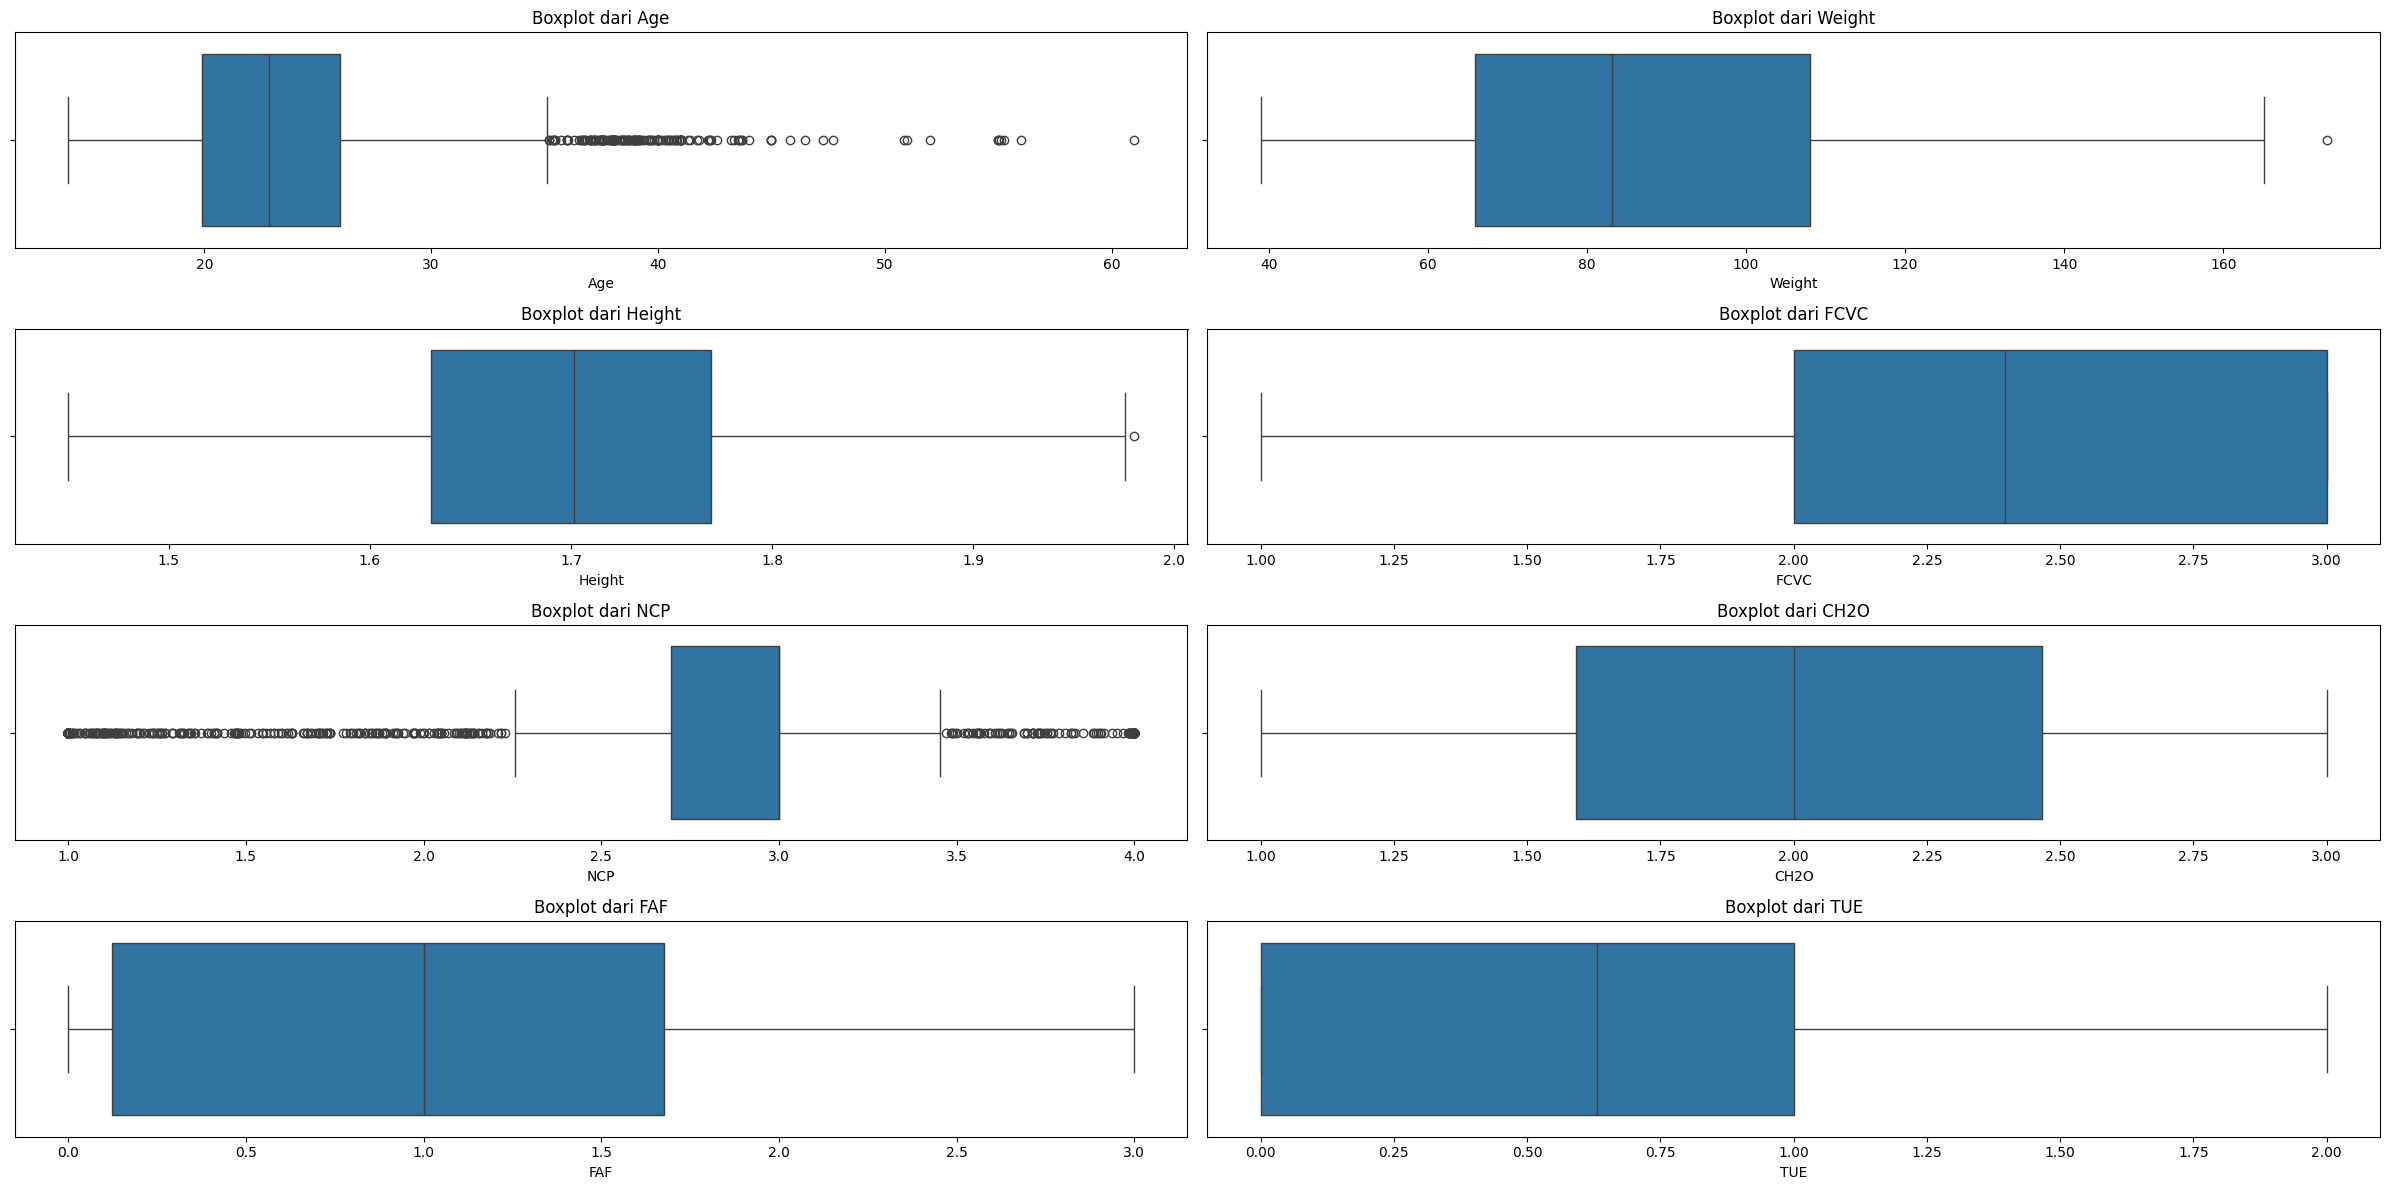

In [11]:
# Menuliskan seluruh nama kolom numerikal
kolom_data = ["Age", "Weight", "Height", "FCVC", "NCP", "CH2O", "FAF", "TUE"]

# Membentuk plot berukuran 24 x 12
plt.figure(figsize = (24, 12))

# Membentuk plot berisi 8 subplot, dengan setiap subplot merupakan boxplot
for i in range(len(kolom_data)):

    # Membentuk plot dengan subplot berukuran 4 x 2
    plt.subplot(4, 2, i + 1)
    sns.boxplot(x = data[kolom_data[i]])
    plt.title('Boxplot dari {}'.format(kolom_data[i]))
    plt.tight_layout()

Berikut adalah interpretasi dari boxplot di atas.
1. Pada kolom `Age`, dapat dilihat bahwa mayoritas responden berusia di rentang 20-30 tahun. Terdapat beberapa outlier, yaitu usia 50 tahun ke atas. Meski demikian, outlier ini tidak akan dihapus karena sangat memungkinkan seseorang berusia 50 tahun ke atas.
2. Pada kolom `Weight`, dapat dilihat bahwa mayoritas responden memiliki berat badan di rentang 60-110 kilogram. Terdapat 1 outlier, yaitu responden dengan berat badan 173 kilogram. Meski demikian, outlier ini tidak akan dihapus karena sangat memungkinkan seseorang memiliki berat badan 173 kilogram.
3. Pada kolom `Height`, dapat dilihat bahwa mayoritas responden memiliki tinggi badan di rentang 1,6-1,8 meter. Terdapat 1 outlier, yaitu responden dengan tinggi badan 1,98 meter. Meski demikian, outlier ini tidak akan dihapus karena sangat memungkinkan seseorang memiliki tinggi badan 1,98 meter.
4. Pada kolom-kolom lainnya, dapat dilihat bahwa persebaran data merata dan tidak terdapat outlier yang signifikan.

Untuk proses analisis ini, outlier tidak akan dibuang karena sangat memungkinkan responden termasuk dalam outlier tersebut. Data sudah siap untuk diproses dan dianalisis.

# Univariate Analysis

Pertama, kita akan membagi variabel-variabel yang ada menjadi 2 kategori, yaitu kategori numerikal dan kategori kategorical.

In [12]:
# Membentuk list berisi kolom-kolom numerikal (data yang bertipe float64)
kolom_numerikal = [nama_kolom for nama_kolom in data if data[nama_kolom].dtype == "float64"]

# Membentuk list berisi kolom-kolom kategorikal (data yang bertipe object)
kolom_kategorikal = [nama_kolom for nama_kolom in data if data[nama_kolom].dtype == "object"]

# Menampilkan list kolom numerikal dan kolom kategorikal
print("Kolom-kolom numerikal: ", kolom_numerikal)
print("Kolom-kolom kategorikal: ", kolom_kategorikal)

Kolom-kolom numerikal:  ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
Kolom-kolom kategorikal:  ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad']


Selanjutnya, kita akan melihat nilai-nilai pada kolom kategorikal.

In [13]:
# Menghitung jumlah nilai yang unik/berbeda dari masing-masing variabel pada kolom kategorikal
jumlah_unik = data[kolom_kategorikal].nunique()

# Menampilkan nilai yang unik/berbeda dari masing-masing variabel pada kolom kategorikal
nilai_unik = data[kolom_kategorikal].apply(lambda x: x.unique())

# Menampilkan hasil dalam bentuk DataFrame
pd.DataFrame({"Total Nilai Berbeda": jumlah_unik, "Nilai-Nilai": nilai_unik})

,Total Nilai Berbeda,Nilai-Nilai
Gender,2,"[Female, Male]"
family_history_with_overweight,2,"[yes, no]"
FAVC,2,"[no, yes]"
CAEC,4,"[Sometimes, Frequently, Always, no]"
SMOKE,2,"[no, yes]"
SCC,2,"[no, yes]"
CALC,4,"[no, Sometimes, Frequently, Always]"
MTRANS,5,"[Public_Transportation, Walking, Automobile, M..."
NObeyesdad,7,"[Normal_Weight, Overweight_Level_I, Overweight..."


Selanjutnya, kita akan melihat jumlah dari masing-masing nilai pada hasil di atas.

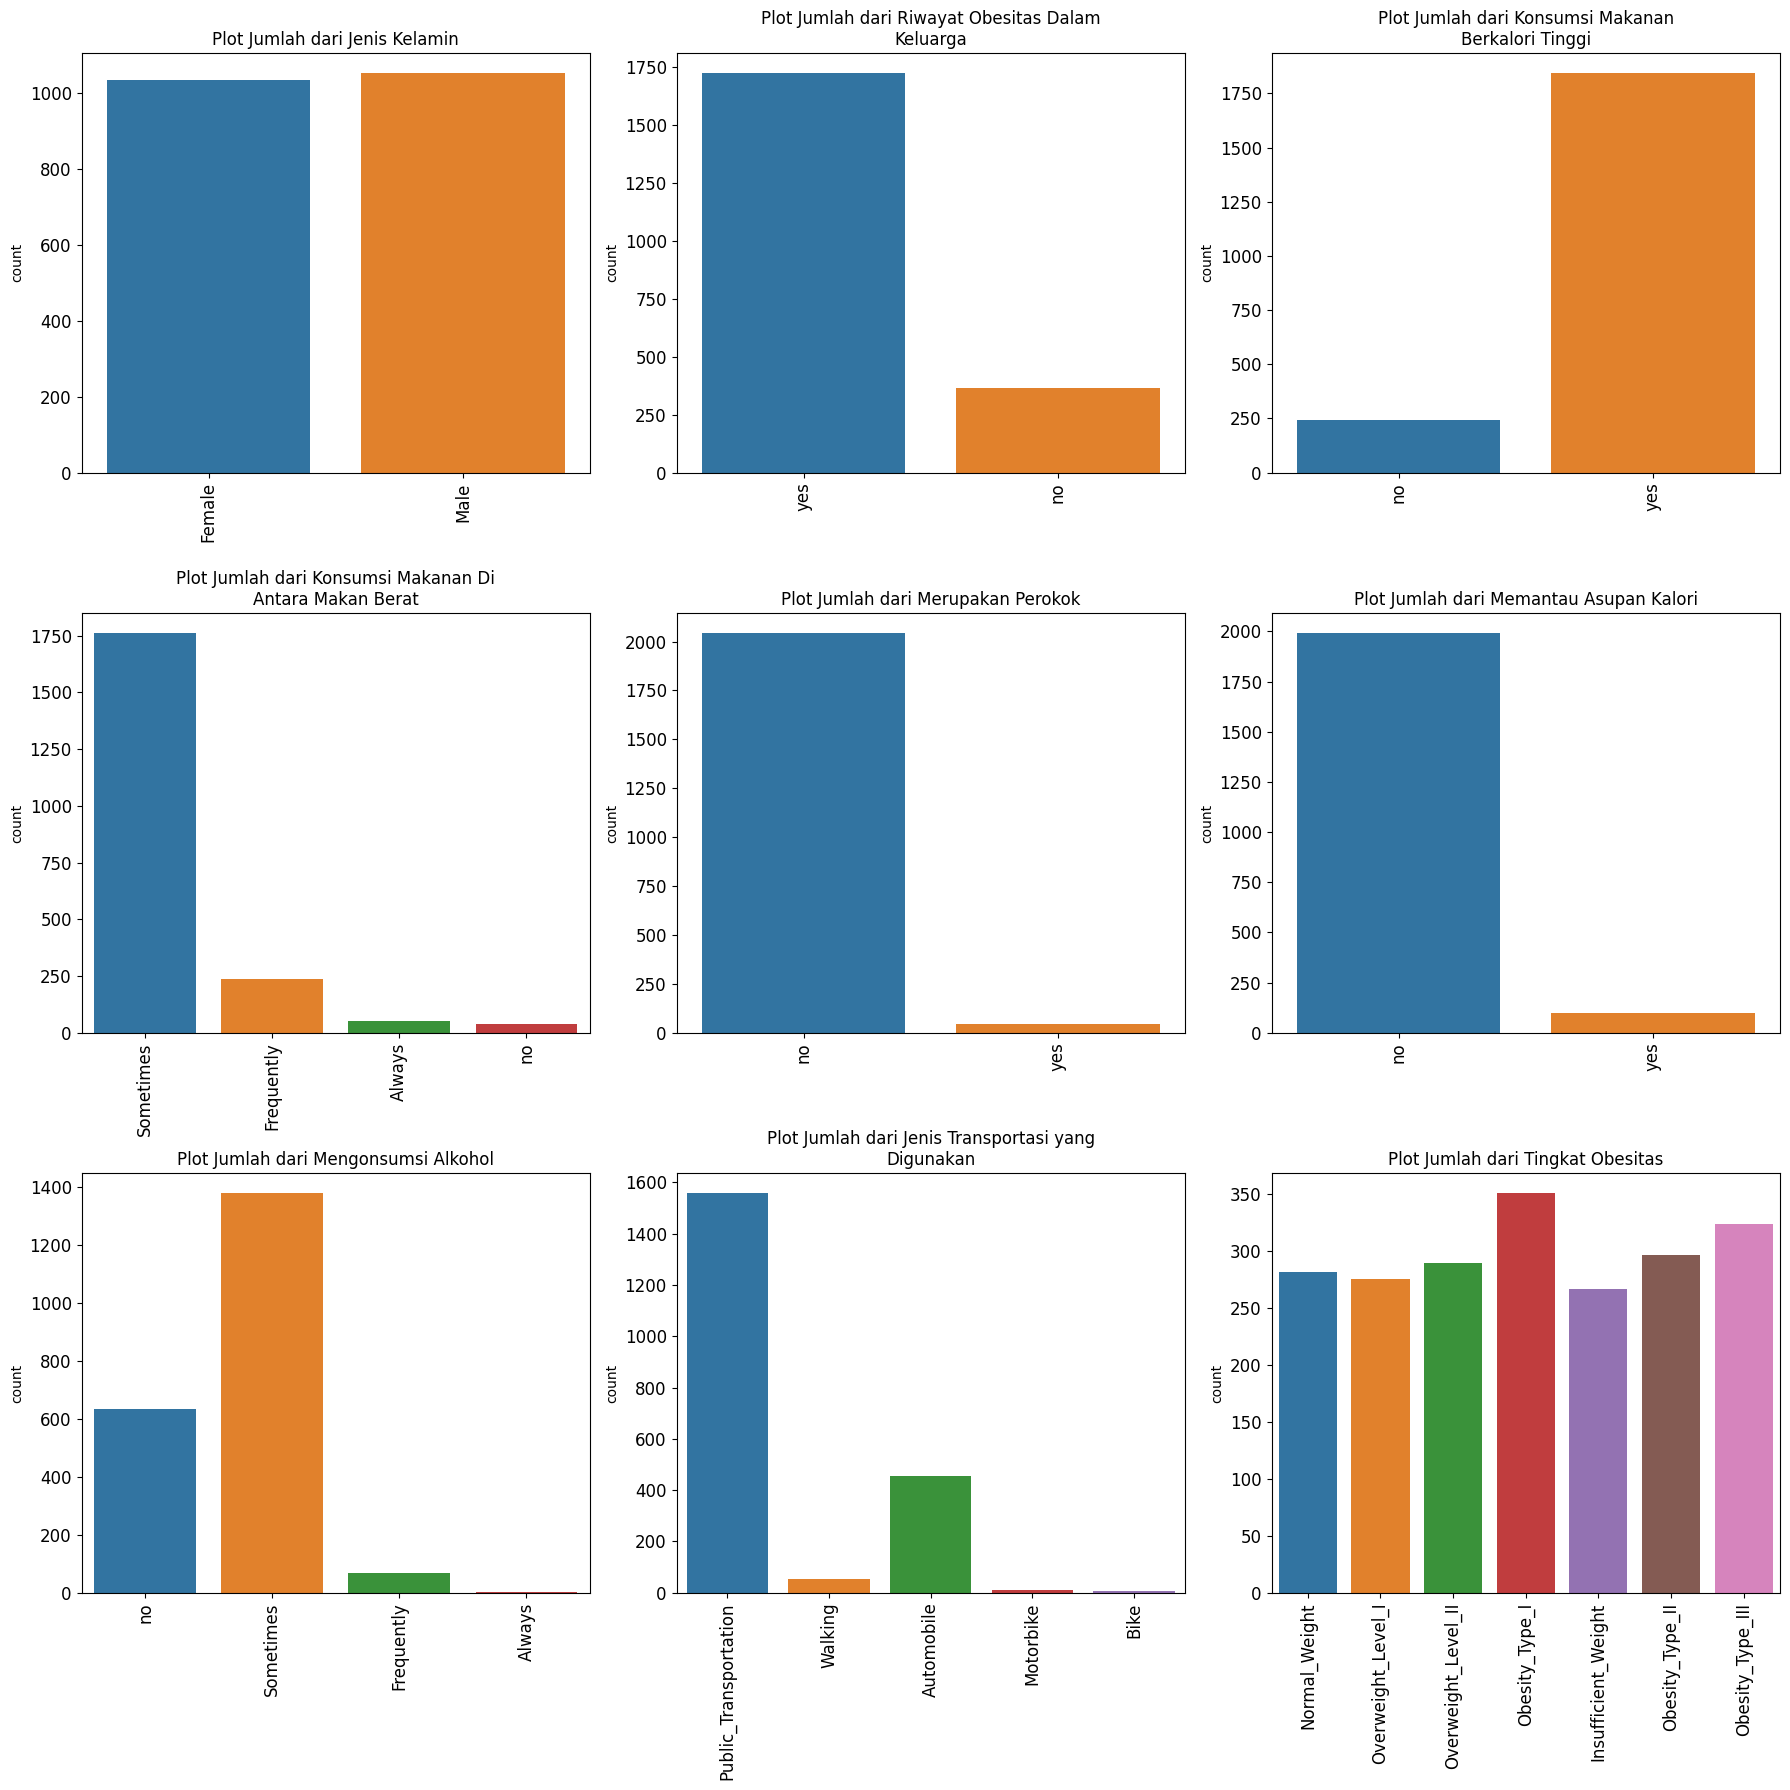

In [14]:
# Membentuk plot dengan subplot sejumlah 9 berukuran 3 x 3
fig, axes = plt.subplots(3, 3, figsize = (18, 18))

# Mengubah array multi dimensi menjadi array 1 dimensi
axes = axes.flatten()

# Mendeskripsikan kolom-kolom kategorikal yang akan digunakan
deskripsi_kolom_kategorikal = ["Jenis Kelamin",
                               "Riwayat Obesitas Dalam Keluarga",
                               "Konsumsi Makanan Berkalori Tinggi",
                               "Konsumsi Makanan Di Antara Makan Berat",
                               "Merupakan Perokok",
                               "Memantau Asupan Kalori",
                               "Mengonsumsi Alkohol",
                               "Jenis Transportasi yang Digunakan",
                               "Tingkat Obesitas"]

# Membentuk plot jumlah dalam bentuk bar plot untuk masing-masing kolom
for i, kolom in enumerate(data[kolom_kategorikal].columns):
    sns.countplot(x = kolom, data = data, ax = axes[i], hue = kolom)

    # Menambahkan judul untuk masing-masing plot
    judul = "\n".join(textwrap.wrap(f"Plot Jumlah dari {deskripsi_kolom_kategorikal[i]}", width = 40))
    axes[i].set_title(judul)
    axes[i].title.set_size(12)

    # Mengatur label x
    axes[i].tick_params(axis = "x", labelrotation = 90)
    axes[i].tick_params(axis = "both", which = "major", labelsize = 12)
    axes[i].set_xlabel("")

# Mengatur susunan agar tidak berhimpitan
plt.tight_layout()

# Menampilkan plot
plt.show()

Gambar di atas dapat diinterpretasikan sebagai berikut.
1. Dari `Plot Jumlah dari Riwayat Obesitas Dalam Keluarga`, mayoritas responden memiliki riwayat obesitas dalam keluarganya.
2. Dari `Plot Jumlah dari Frekuensi Konsumsi Makanan Berkalori Tinggi`, mayoritas responden memakan makanan berkalori tinggi.
3. Dari `Plot Jumlah dari Konsumsi Makanan Di Antara Makan Berat`, mayoritas responden memakan makanan seperti cemilan atau snacks di antara makan berat.
4. Dari `Plot Jumlah dari Perokok atau Bukan`, mayoritas responden bukanlah perokok.
5. Dari `Plot Jumlah dari Memantau Asupan Kalori`, mayoritas responden tidak memantau asupan kalori mereka masing-masing.
6. Dari `Plot Jumlah dari Mengonsumsi Alkohol`, sebagian besar responden terkadang minum alkohol dan sebagian kecil responden tidak meminum alkohol.
7. Dari `Plot Jumlah dari Jenis Transportasi yang Digunakan`, mayoritas responden menggunakan transportasi umum sebagai sarana transportasi mereka
8. Dari `Plot Jumlah dari Tingkat Obesitas`, persebaran tingkat level obesitas cukup merata, dengan Obesitas tipe 1 merupakan jumlah yang paling banyak dialami responden.

Selanjutnya, kita akan membentuk histogram dari variabel-variabel numerikal untuk melihat persebaran data.

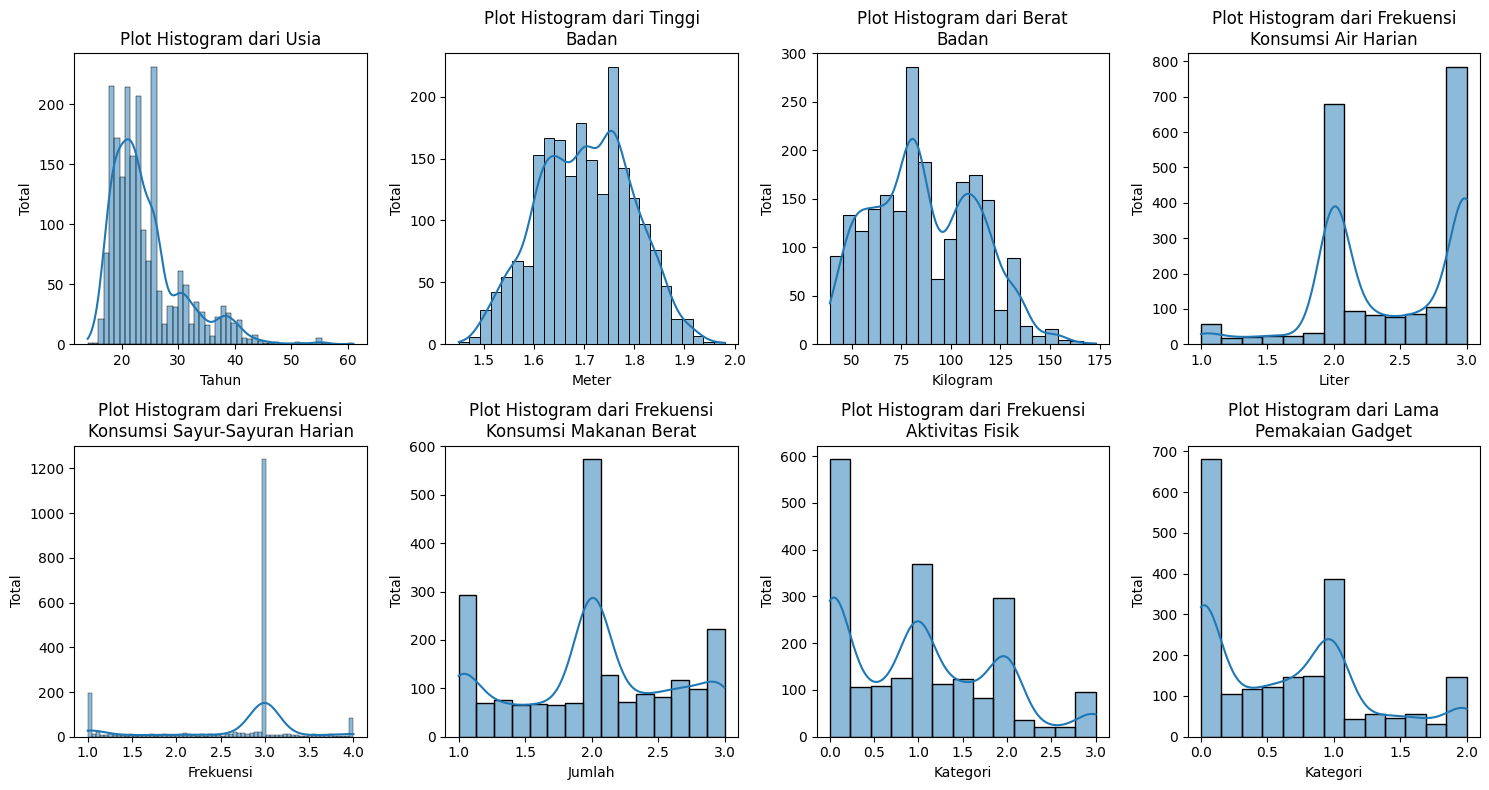

In [15]:
# Membentuk plot dengan subplot sejumlah 8 berukuran 2 x 4
fig, axes = plt.subplots(2, 4, figsize = (15, 8))

# Mengubah array multi dimensi menjadi array 1 dimensi
axes = axes.flatten()

# Menambahkan satuan dari masing-masing kolom
labels = ["Tahun", "Meter", "Kilogram", "Liter", "Frekuensi", "Jumlah", "Kategori", "Kategori"]

# Mendeskripsikan kolom-kolom numerikal yang akan digunakan
deskripsi_kolom_numerikal = ["Usia",
                             "Tinggi Badan",
                             "Berat Badan",
                             "Frekuensi Konsumsi Air Harian",
                             "Frekuensi Konsumsi Sayur-Sayuran Harian",
                             "Frekuensi Konsumsi Makanan Berat",
                             "Frekuensi Aktivitas Fisik",
                             "Lama Pemakaian Gadget"]

# Membentuk plot jumlah dalam bentuk histogram plot untuk masing-masing kolom
for i, kolom in enumerate(data[kolom_numerikal].columns):
    sns.histplot(data = data, x = kolom, kde = True, ax = axes[i])

    # Menambahkan judul untuk masing-masing plot
    judul = "\n".join(textwrap.wrap(f"Plot Histogram dari {deskripsi_kolom_numerikal[i]}", width = 30))
    axes[i].set_title(judul)
    axes[i].title.set_size(12)

    # Mengatur label x
    axes[i].set_xlabel(labels[i])
    axes[i].set_ylabel("Total")

# Mengatur susunan agar tidak berhimpitan
plt.tight_layout()

# Menampilkan plot
plt.show()

Gambar di atas dapat diinterpretasikan sebagai berikut.
1. Plot Histogram dari `Konsumsi Air Harian`, `Frekuensi Aktivitas Fisik`, `Lama Pemakaian Gadget` tidak berdistribusi normal.
2. Plot Histogram dari `Tinggi Badan`, `Frekuensi Konsumsi Sayur-Sayuran`, `Frekuensi Konsumsi Makanan Berat` cukup berdistribusi normal.
3. Plot Histogram dari `Usia` dan `Berat Badan` memiliki distribusi data yang miring ke kanan. Artinya, mayoritas data memiliki nilai di bawah rata-rata.

# Multivariate Analysis

## 1. Membandingkan Tingkat Berat Badan Pada Setiap Jenis Kelamin

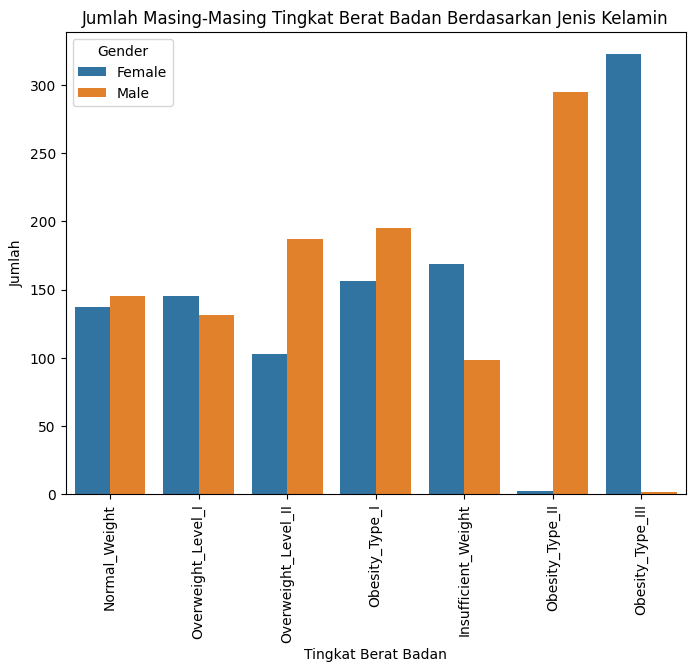

In [16]:
# Membentuk plot jumlah dalam bentuk bar plot antara tingkat berat badan dengan jenis kelamin
plt.figure(figsize = (8, 6))
sns.countplot(x = "NObeyesdad", data = data, hue = "Gender")

# Menambahkan judul pada plot
plt.title("Jumlah Masing-Masing Tingkat Berat Badan Berdasarkan Jenis Kelamin")

# Menambahkan label sumbu x dan y pada plot
plt.xticks(rotation = 90)
plt.xlabel("Tingkat Berat Badan")
plt.ylabel("Jumlah")

# Menampilkan plot
plt.show()

Dari gambar di atas, dapat disimpulkan bahwa
1. Laki-laki lebih banyak memiliki berat badan berlebih tingkat 2 dan obesitas tingkat 1 dibandingkan perempuan.
2. Hampir seluruh obesitas tingkat 2 dialami oleh laki-laki, sedangkan hampir seluruh obesitas tingkat 3 dialami oleh perempuan.

## 2. Membandingkan Tingkat Berat Badan dengan Usia

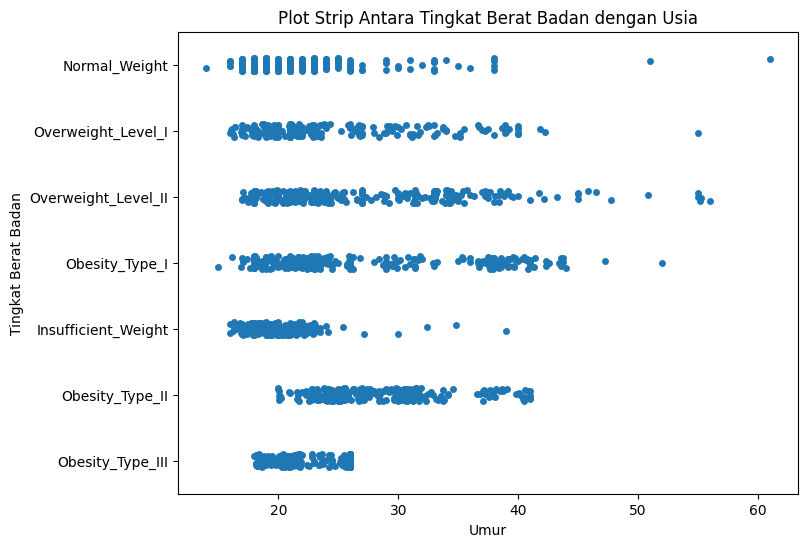

In [17]:
# Membentuk plot strip antara tingkat berat badan dengan usia
plt.figure(figsize = (8, 6))
sns.stripplot(data = data, x = "Age", y = "NObeyesdad")

# Menambahkan judul pada plot
plt.title("Plot Strip Antara Tingkat Berat Badan dengan Usia")

# Menambahkan label sumbu x dan y pada plot
plt.xlabel("Umur")
plt.ylabel("Tingkat Berat Badan")

# Menampilkan plot
plt.show()

Dari gambar di atas, disimpulkan bahwa
1. Seluruh penyandang obesitas tingkat 3 berusia di bawah 30 tahun.
2. Seluruh penyandang obesitas tingkat 2 berusia di sekitar rentang 20-40 tahun.

## 3. Membandingkan Tingkat Berat Badan dengan Jumlah Makan Berat

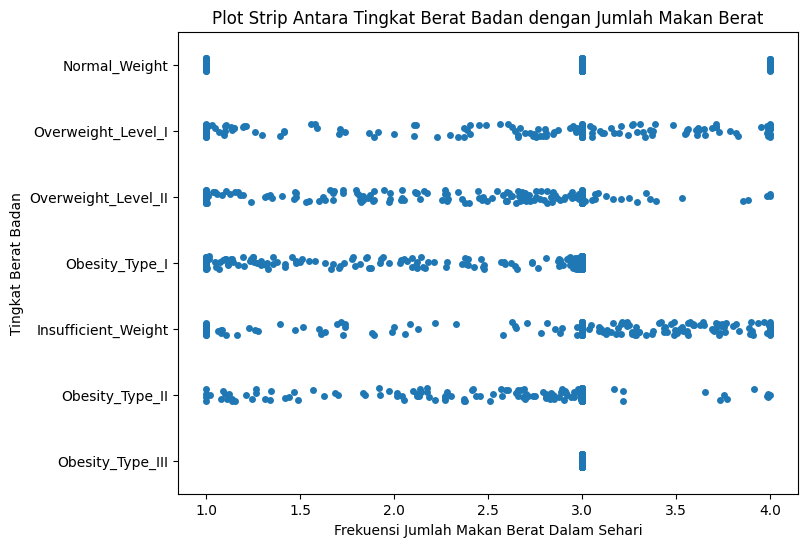

In [18]:
# Membentuk plot strip antara tingkat berat badan dengan usia
plt.figure(figsize = (8, 6))
sns.stripplot(data = data, x = "NCP", y = "NObeyesdad")

# Menambahkan judul pada plot
plt.title("Plot Strip Antara Tingkat Berat Badan dengan Jumlah Makan Berat")

# Menambahkan label sumbu x dan y pada plot
plt.xlabel("Frekuensi Jumlah Makan Berat Dalam Sehari")
plt.ylabel("Tingkat Berat Badan")

# Menampilkan plot
plt.show()

Dari gambar di atas, disimpulkan bahwa
1. Seluruh penyandang obesitas tingkat 3 makan berat sebanyak 3 kali dalam sehari.
2. Penyandang obesitas tingkat 1 makan berat sebanyak rentang 1-3 kali dalam sehari.
3. Seluruh responden selain poin nomor 1 dan 2 memiliki jumlah makan berat yang bervariasi, dari rentang 1-4 kali makan dalam sehari.

## 4. Membandingkan Tingkat Berat Badan dengan Frekuensi Aktivitas Fisik

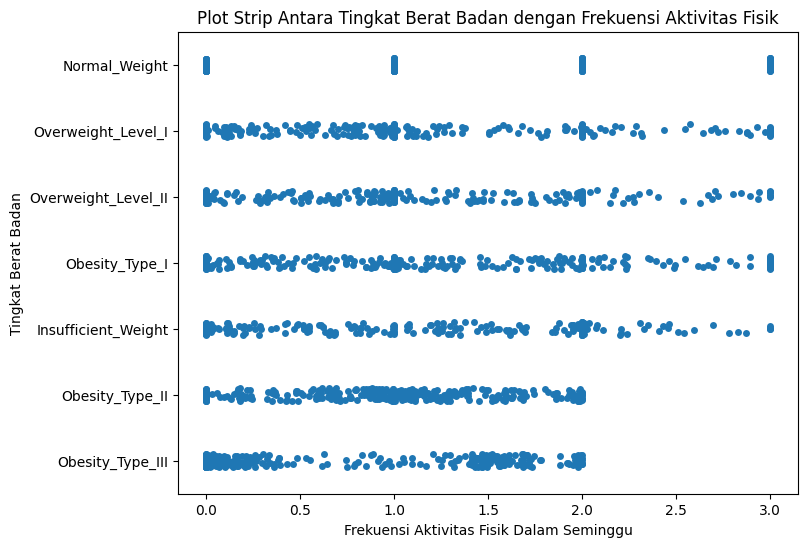

In [19]:
# Membentuk plot strip antara tingkat berat badan dengan usia
plt.figure(figsize = (8, 6))
sns.stripplot(data = data, x = "FAF", y = "NObeyesdad")

# Menambahkan judul pada plot
plt.title("Plot Strip Antara Tingkat Berat Badan dengan Frekuensi Aktivitas Fisik")

# Menambahkan label sumbu x dan y pada plot
plt.xlabel("Frekuensi Aktivitas Fisik Dalam Seminggu")
plt.ylabel("Tingkat Berat Badan")

# Menampilkan plot
plt.show()

Keterangan
* 0 = Tidak pernah
* 1 = 1-2 hari
* 2 = 3-4 hari
* 3 = 5-6 hari

Dari gambar di atas, disimpulkan bahwa penyandang obesitas tingkat 2 dan tingkat 3 melakukan aktivitas fisik kurang dari 3-4 hari dalam seminggu.

## 5. Membandingkan Tingkat Berat Badan dengan Frekuensi Konsumsi air

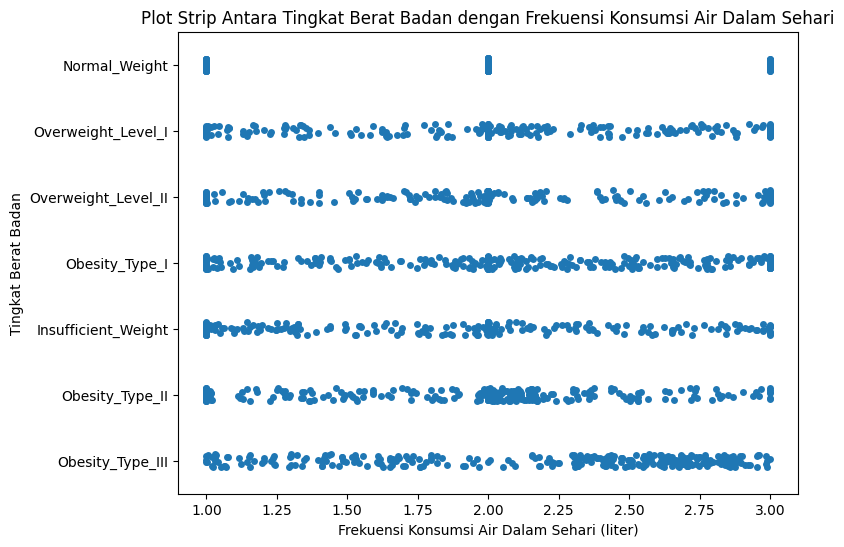

In [20]:
# Membentuk plot strip antara tingkat berat badan dengan usia
plt.figure(figsize = (8, 6))
sns.stripplot(data = data, x = "CH2O", y = "NObeyesdad")

# Menambahkan judul pada plot
plt.title("Plot Strip Antara Tingkat Berat Badan dengan Frekuensi Konsumsi Air Dalam Sehari")

# Menambahkan label sumbu x dan y pada plot
plt.xlabel("Frekuensi Konsumsi Air Dalam Sehari (liter)")
plt.ylabel("Tingkat Berat Badan")

# Menampilkan plot
plt.show()

Dari gambar di atas, disimpulkan bahwa seluruh responden di setiap tingkat berat badan memiliki frekuensi konsumsi air yang beragam, dengan rentang 1-3 liter dalam sehari.

## 6. Membandingkan Tingkat Berat Badan dengan Konsumsi Makanan Di Antara Makan Berat

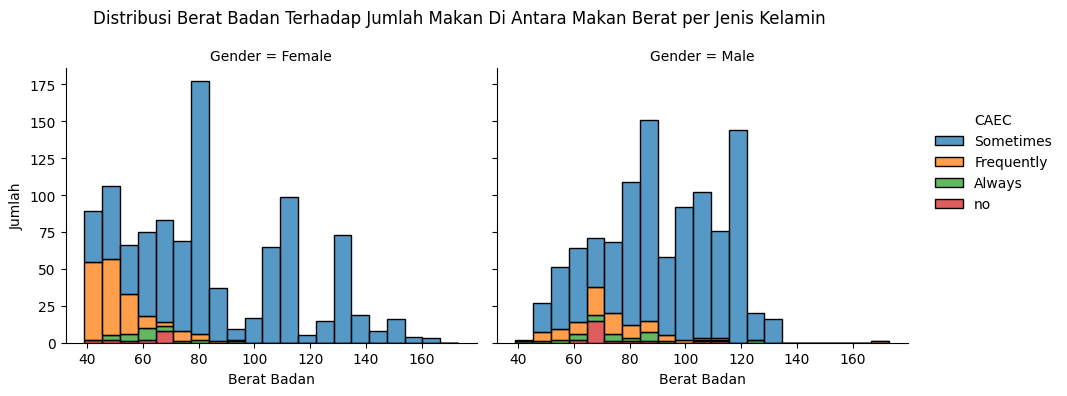

In [21]:
# Membentuk plot dsitribusi antara tingkat berat badan dengan konsumsi makanan di antara makan berat
plot_six = sns.displot(data, x = "Weight", hue = "CAEC", multiple = "stack", col = "Gender", height = 4)

# Mengubah letak legend
sns.move_legend(plot_six, "upper left", bbox_to_anchor = (1, 0.75))

# Menambahkan judul untuk seluruh plot
plt.suptitle('Distribusi Berat Badan Terhadap Jumlah Makan Di Antara Makan Berat per Jenis Kelamin', fontsize = 12)

# Menambahkan label sumbu x dan y pada plot
for ax in plot_six.axes.flat:
    ax.set_xlabel("Berat Badan")
plot_six.set(ylabel = "Jumlah")

# Mengatur susunan agar tidak berhimpitan
plt.tight_layout()

# Menampilkan plot
plt.show()

Dari gambar di atas, disimpulkan bahwa
1. Mayoritas responden baik laki-laki maupun perempuan terkadang makan di antara makanan berat.
2. Responden yang sering atau selalu makan di antara makanan berat memiliki berat badan kurang dari 120 kilogram.
3. Lebih banyak laki-laki yang sering makan di antara makanan berat dan memiliki berat badan di atas 60 kilogram dibandingkan perempuan.

## 7. Membandingkan Tingkat Berat Badan dengan Jenis Transportasi yang Digunakan

<ipython-input-22-c55ee61a5ac1>:3: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  plot_seven = sns.histplot(data = data, x = "NObeyesdad", hue = "MTRANS", legend = True,


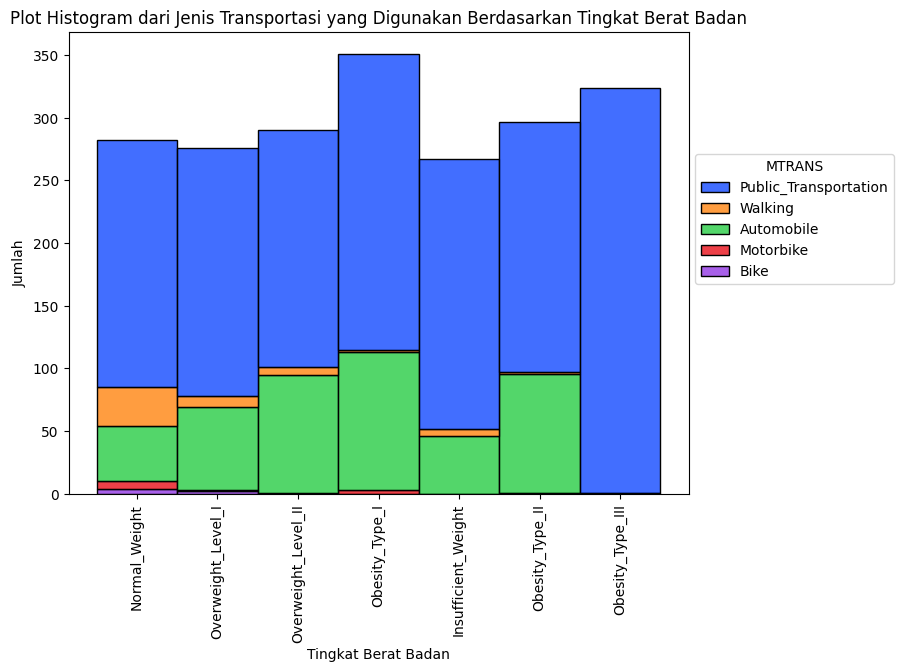

In [22]:
# Membentuk bar plot bertumpuk antara tingkat berat badan dengan jenis transportasi yang digunakan
plt.figure(figsize = (8, 6))
plot_seven = sns.histplot(data = data, x = "NObeyesdad", hue = "MTRANS", legend = True,
                          multiple = "stack", palette = sns.color_palette("bright"))

# Menambahkan judul pada plot
plt.title("Plot Histogram dari Jenis Transportasi yang Digunakan Berdasarkan Tingkat Berat Badan")

# Mengubah letak legend
sns.move_legend(plot_seven, "upper left", bbox_to_anchor = (1, 0.75))

# Menambahkan label sumbu x dan y pada plot
plt.xlabel("Tingkat Berat Badan")
plt.xticks(rotation = 90)
plt.ylabel("Jumlah")

# Menampilkan plot
plt.show()

Dari gambar di atas, disimpulkan bahwa
1. Mayoritas responden menggunakan transportasi umum sebagai sarana transportasi mereka.
2. Seluruh penyandang obesitas tingkat 3 menggunakan transportasi umum sebagai sarana transportasi mereka.

## 8. Membandingkan Tingkat Berat Badan dengan Frekuensi Konsumsi Alkohol

<ipython-input-23-6bee483d837a>:3: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  plot_eight = sns.histplot(data = data, x = "NObeyesdad", hue = "CALC", legend = True,


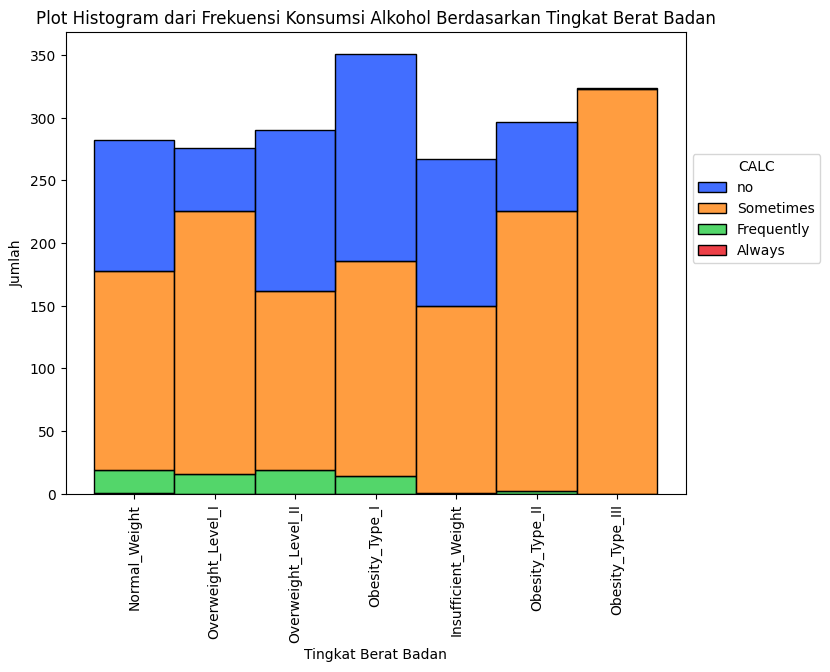

In [23]:
# Membentuk bar plot bertumpuk antara tingkat berat badan dengan frekuensi konsumsi alkohol
plt.figure(figsize = (8, 6))
plot_eight = sns.histplot(data = data, x = "NObeyesdad", hue = "CALC", legend = True,
                          multiple = "stack", palette = sns.color_palette("bright"))

# Menambahkan judul pada plot
plt.title("Plot Histogram dari Frekuensi Konsumsi Alkohol Berdasarkan Tingkat Berat Badan")

# Mengubah letak legend
sns.move_legend(plot_eight, "upper left", bbox_to_anchor = (1, 0.75))

# Menambahkan label sumbu x dan y pada plot
plt.xlabel("Tingkat Berat Badan")
plt.xticks(rotation = 90)
plt.ylabel("Jumlah")

# Menampilkan plot
plt.show()

Dari gambar di atas, disimpulkan bahwa
1. Mayoritas responden terkadang mengonsumsi alkohol.
2. Seluruh penyandang obesitas tingkat 3 terkadang mengonsumsi alkohol.

## 9. Melihat Korelasi Variabel dengan Menggunakan Heatmap

Selanjutnya, kita akan mencari variabel numerik yang mempengaruhi berat badan seseorang.

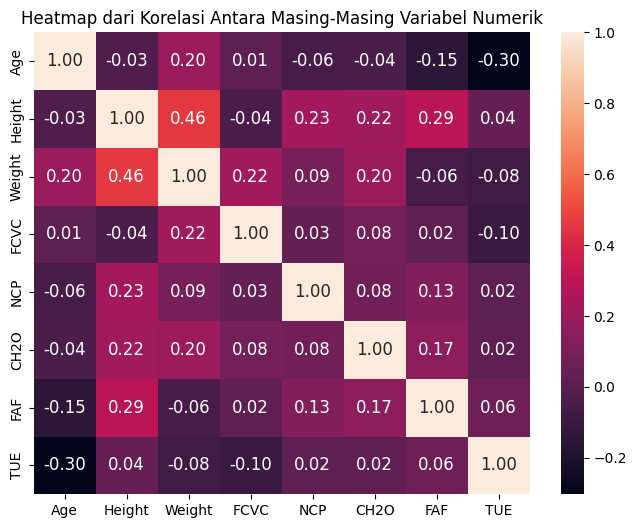

In [24]:
# Mencari korelasi antara masing-masing variabel numerik dengan korelasi pearson
corr = data.corr(method = "pearson", numeric_only = True)

# Membentuk heatmap antara masing-masing variabel numerik dan ditampilkan dalam bentuk desimal 2 angka di belakang koma
plt.figure(figsize = (8, 6))
sns.heatmap(corr, annot = True, fmt = ".2f", annot_kws = {"size": 12})

# Menambahkan judul pada plot
plt.title("Heatmap dari Korelasi Antara Masing-Masing Variabel Numerik")

# Menampilkan plot
plt.show()

Dari heatmap di atas, dapat dilihat bahwa berat badan responden memiliki
1. Korelasi positif yang cukup kuat dengan tinggi badan.
2. Korelasi positif yang lemah terhadap usia, frekuensi konsumsi sayur-sayuran dalam sehari, dan frekuensi konsumsi air dalam sehari.
3. Korelasi positif yang sangat lemah terhadap frekuensi konsumsi makanan berat.
4. Korelasi negatif yang sangat lemah terhadap frekuensi aktivitas fisik dalam seminggu dan waktu pemakaian gadget dalam sehari.

## 10. Melihat Plot Scatter yang Memiliki Nilai Korelasi $\geq$ 0.2 dari Berat Badan

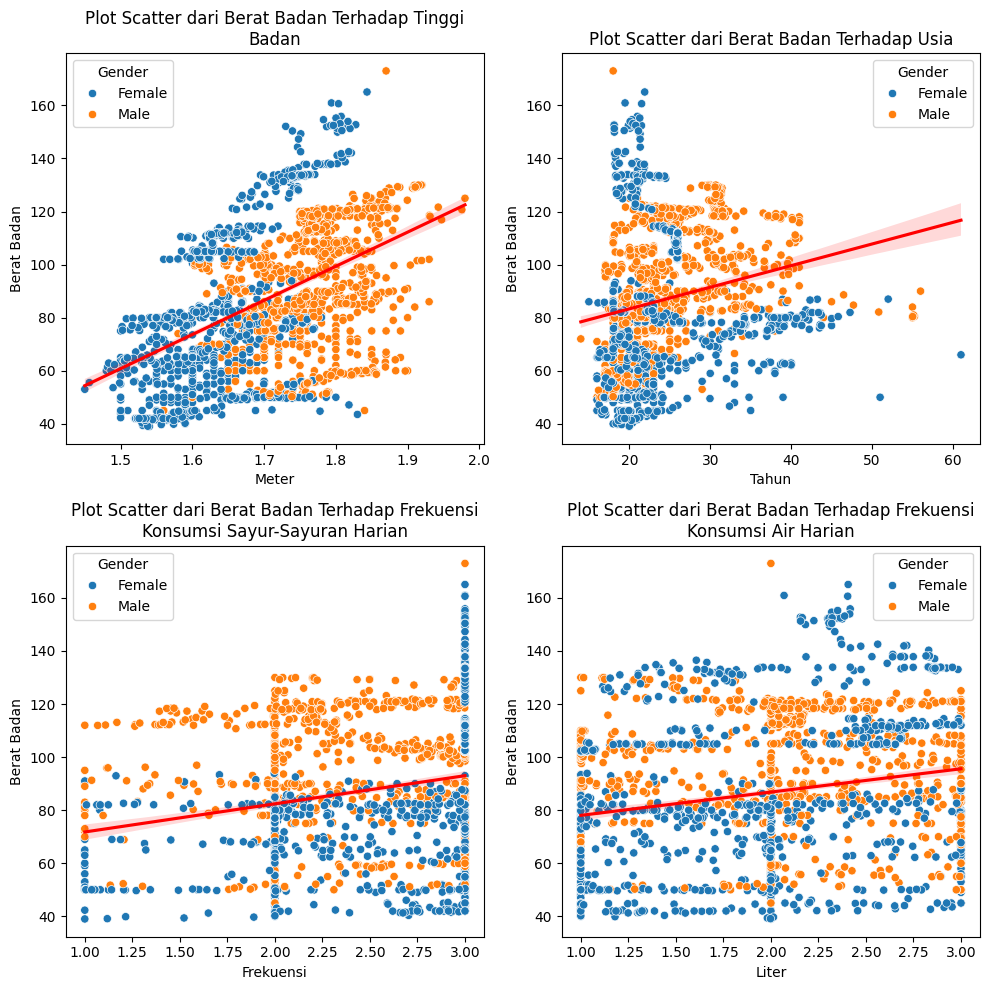

In [25]:
# Membentuk plot dengan subplot sejumlah 4 berukuran 2 x 2
fig, axes = plt.subplots(2, 2, figsize = (10, 10))

# Mengubah array multi dimensi menjadi array 1 dimensi
axes = axes.flatten()

# Menambahkan satuan dari masing-masing kolom
labels = ["Meter", "Tahun", "Frekuensi", "Liter"]

# Membentuk dictionary dari variabel yang memiliki nilai korelasi lebih dari / sama dengan 0.2
data_x = {0: "Height", 1: "Age", 2: "FCVC", 3: "CH2O"}

# Mendeskripsikan kolom-kolom numerikal yang akan digunakan berdasarkan dictionary di atas
deskripsi_kolom = ["Tinggi Badan",
                   "Usia",
                   "Frekuensi Konsumsi Sayur-Sayuran Harian",
                   "Frekuensi Konsumsi Air Harian"]

# Membentuk plot scatter untuk masing-masing kolom beserta garis trend
for keys, values in data_x.items():
    sns.scatterplot(data = data, x = values, y = "Weight", hue = "Gender", ax = axes[keys])
    sns.regplot(data = data, x = values, y = "Weight", scatter = False, ax = axes[keys], color=  "red")

    # Menambahkan judul untuk masing-masing plot
    judul = "\n".join(textwrap.wrap(f"Plot Scatter dari Berat Badan Terhadap {deskripsi_kolom[keys]}", width = 50))
    axes[keys].set_title(judul)
    axes[keys].title.set_size(12)

    # Menambahkan label sumbu x dan y pada plot
    axes[keys].set_xlabel(labels[keys])
    axes[keys].set_ylabel("Berat Badan")

# Mengatur susunan agar tidak berhimpitan
plt.tight_layout()

# Menampilkan plot
plt.show()

Seperti pada nomor 9, dapat dilihat bahwa terdapat
* Korelasi positif yang cukup kuat dengan tinggi badan karena garis trend mengarah ke arah kanan atas.
* Korelasi positif yang lemah terhadap usia, frekuensi konsumsi sayur-sayuran dalam sehari, dan frekuensi konsumsi air dalam sehari karena garis trend mengarah sedikit ke arah kanan atas.

# Data Preprocessing

Akan dilakukan encoding terhadap seluruh data kategorikal agar seluruh data merupakan data numerik.

## Encoding Kategorikal

Encoding Kategorikal dilakukan terhadap 4 variabel, yaitu
* `family_history_with_overweight` (Apakah terdapat anggota keluarga responden yang juga terkena obesitas)
* `FAVC` (Apakah responden mengonsumsi makanan berkalori tinggi)
* `SMOKE` (Apakah responden merupakan perokok)
* `SCC` (Apakah responden memantau asupan kalori)

karena kategori-kategori pada keempat variabel tersebut hanya berisi antara `yes` (iya) dan `no` (tidak)

In [26]:
# Membuat list kolom-kolom kategorikal yang memiliki entri antara yes dan no
Encoding_Kategorikal = ["family_history_with_overweight", "FAVC", "SMOKE", "SCC"]

# Mengubah nilai yes menjadi 1 dan nilai no menjadi 0 pada seluruh kolom tersebut
for kategori in Encoding_Kategorikal:
    data[kategori] = data[kategori].map({"yes": 1, "no": 0})

## One Hot Encoding

One Hot Encoding dilakukan terhadap 2 variabel, yaitu

* `MTRANS` (Jenis transportasi yang digunakan)
* `Gender` (Jenis kelamin responden)

karena kategori-kategori pada kedua variabel tersebut tidak memiliki urutan tertentu

In [27]:
# Membentuk kolom dummy dari kolom MTRANS dan Gender
data_encoded = pd.get_dummies(data[["MTRANS", "Gender"]], drop_first = True)

# Menggabungkan data asli dengan data dummy yang telah dibuat
data = pd.concat([data, data_encoded], axis = 1)

# Menghapus kolom MTRANS dan Gender
data.drop(columns = ["MTRANS", "Gender"], inplace = True)

## Encoding Ordinal

Encoding Ordinal dilakukan terhadap 2 variabel, yaitu
* CAEC (Konsumsi makanan di antara makan berat)
* CALC (Frekuensi konsumsi alkohol)

karena kategori-kategori pada kedua variabel tersebut memiliki urutan dengan urutannya adalah ['no', 'Sometimes', 'Frequently', 'Always']

In [28]:
# Mendefinisikan urutan encoding
encoding_order = ['no', 'Sometimes', 'Frequently', 'Always']

# Membentuk encoding ordinal dengan OrdinalEncoder
ordinal_encoder = OrdinalEncoder(categories = [encoding_order] * 2)

# Mengaplikasikan encoding ordinal untuk kolom CALC dan CAEC
data[['CALC', 'CAEC']] = ordinal_encoder.fit_transform(data[['CALC', 'CAEC']])

# Menampilkan 5 baris pertama dari data setelah dilakukan data preprocessing
data.head()

,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,NObeyesdad,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,Gender_Male
0,21.0,1.62,64.0,1,0,2.0,3.0,1.0,0,2.0,0,0.0,1.0,0.0,Normal_Weight,False,False,True,False,False
1,21.0,1.52,56.0,1,0,3.0,3.0,1.0,1,3.0,1,3.0,0.0,1.0,Normal_Weight,False,False,True,False,False
2,23.0,1.80,77.0,1,0,2.0,3.0,1.0,0,2.0,0,2.0,1.0,2.0,Normal_Weight,False,False,True,False,True
3,27.0,1.80,87.0,0,0,3.0,3.0,1.0,0,2.0,0,2.0,0.0,2.0,Overweight_Level_I,False,False,False,True,True
4,22.0,1.78,89.8,0,0,2.0,1.0,1.0,0,2.0,0,0.0,0.0,1.0,Overweight_Level_II,False,False,True,False,True


Selanjutnya, karena target kita adalah variabel `NObeyesdad` untuk mengetahui akurasi prediksi dari tingkat berat badan, maka kita akan membuang kolom tersebut dari data dan assign kolom tersebut ke variabel baru.

In [29]:
# Membentuk variabel X sebagai pengaruh dari target
X = data.drop(columns = "NObeyesdad")

# Membentuk variabel y sebagai target
y = data["NObeyesdad"]

Lalu, kita membagi data menjadi 2, yaitu
* Data training sebesar 80% untuk melatih model
* Data testing sebesar 20% untuk menguji model

In [30]:
# Membentuk data training dan data testing dengan komposisi 80% : 20 % dan dirandom setiap dijalankan ulang
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 50)

# Menampilkan ukuran data training dan testing dari X dan y
print("Ukuran X_train: ", X_train.shape)
print("Ukuran X_test: ", X_test.shape)
print("Ukuran y_train: ", y_train.shape)
print("Ukuran y_test: ", y_test.shape)

Ukuran X_train:  (1669, 19)
Ukuran X_test:  (418, 19)
Ukuran y_train:  (1669,)
Ukuran y_test:  (418,)


Lalu, kita akan melihat data training dan testing.

In [31]:
# Menampilkan 5 baris pertama dari data training X
X_train.head()

,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,Gender_Male
1603,24.244029,1.622297,99.982541,1,1,2.941929,3.989492,1.0,0,1.014135,0,1.958694,0.687342,0.0,False,False,True,False,True
551,24.163526,1.646030,49.839685,1,1,3.000000,3.590039,2.0,0,2.730500,0,0.107078,0.000000,0.0,False,False,True,False,False
1769,25.137087,1.772045,114.067936,1,1,1.624366,3.000000,1.0,0,2.081719,0,1.538922,0.356868,1.0,False,False,True,False,True
1214,25.706285,1.585547,80.351263,1,1,2.000000,1.000000,1.0,0,2.000000,0,0.000000,0.000000,1.0,False,False,True,False,False
903,39.965474,1.739293,80.914382,0,1,2.416044,3.196043,1.0,0,1.352649,0,0.148628,1.082660,1.0,False,False,False,False,False


In [32]:
# Menampilkan 5 baris pertama dari data testing X
X_test.head()

,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,Gender_Male
1572,28.825279,1.815347,120.399758,1,1,2.967300,3.000000,1.0,0,2.530035,0,1.045107,0.947866,1.0,False,False,False,False,True
676,19.408999,1.670552,49.804245,0,1,2.794197,3.409363,1.0,0,1.543021,0,2.000000,1.000000,1.0,False,False,True,False,False
454,20.000000,1.680000,68.000000,0,1,3.000000,1.000000,1.0,0,1.000000,0,1.000000,0.000000,0.0,False,False,True,False,False
1490,43.726081,1.592316,77.001030,1,1,2.000000,3.000000,1.0,0,2.806922,0,0.000000,0.000000,1.0,False,False,False,False,False
1326,40.702771,1.548403,80.000000,1,1,2.000000,3.000000,1.0,0,1.326165,0,0.000000,0.000000,1.0,False,False,False,False,False


Kemudian, kita melihat jumlah masing-masing tingkat berat badan pada data testing untuk selanjutnya ditransformasikan menggunakan `LabelEncoder()`

In [33]:
# Menampilkan nilai-nilai dan jumlah dari variabel target
original_labels = y_test.value_counts()
original_labels

NObeyesdad
Obesity_Type_I         76
Obesity_Type_II        72
Obesity_Type_III       66
Overweight_Level_II    54
Overweight_Level_I     52
Normal_Weight          51
Insufficient_Weight    47
Name: count, dtype: int64

In [34]:
# Membentuk encoding ordinal dengan LabelEncoder
le = LabelEncoder()

# Melakukan fitting terhadap data training dan mentransformasikan data training dan testing
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

# Pembuatan Model dan Evaluasi

Seluruh model yang akan dibuat tidak menggunakan hyperparameter tuning. Akan dibuat fungsi evaluasi model terlebih dahulu untuk selanjutnya dipanggil untuk masing-masing model.

In [35]:
# Function for evalution report and plotting confusion matrix
def make_evaluation(y_true, y_pred, title):

    # Membuat list nama target yang diinginkan
    target_nama = ['Insufficient_Weight',
                    'Normal_Weight',
                    'Overweight_Level_I',
                    'Overweight_Level_II',
                    'Obesity_Type_I',
                    'Obesity_Type_II',
                    'Obesity_Type_III']

    # Menampilkan laporan klasifikasi (classification report)
    print(classification_report(y_true, y_pred, target_names = target_nama))

    # Membentuk Confusion Matrix
    fig, ax = plt.subplots(figsize = (10, 5))
    disp = ConfusionMatrixDisplay.from_predictions(y_true, y_pred, ax = ax)

    # Menambahkan label sumbu x dan y pada confusion matrix
    ax.xaxis.set_ticklabels(target_nama, rotation = 90)
    ax.yaxis.set_ticklabels(target_nama)

    # Menghilangkan garis-garis grid
    ax.grid(False)

    # Menambahkan judul pada confusion matrix
    _ = ax.set_title(title)
    plt.show()

## 1. Menggunakan Algoritma Extreme Gradient Boosting (XGBoost)

In [36]:
# Memanggil fungsi XGBClassifier dari library sklearn
model_xgb = XGBClassifier(max_depth = 10, n_estimators = 125,
                          random_state = 30, learning_rate = 0.01, n_jobs = 20)

# Melatih model XGBoost dengan data training pada X dan y
model_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=125, n_jobs=20,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [37]:
# Memprediksi hasil menggunakan data testing berdasarkan model yang telat dilatih
pred_xgb = model_xgb.predict(X_test)

# Menampilkan akurasi model
xgb = accuracy_score(y_test, pred_xgb)
print(xgb)

0.9330143540669856


                     precision    recall  f1-score   support

Insufficient_Weight       0.98      1.00      0.99        47
      Normal_Weight       0.87      0.92      0.90        51
 Overweight_Level_I       0.92      0.93      0.93        76
Overweight_Level_II       0.99      0.99      0.99        72
     Obesity_Type_I       1.00      1.00      1.00        66
    Obesity_Type_II       0.87      0.79      0.83        52
   Obesity_Type_III       0.87      0.87      0.87        54

           accuracy                           0.93       418
          macro avg       0.93      0.93      0.93       418
       weighted avg       0.93      0.93      0.93       418



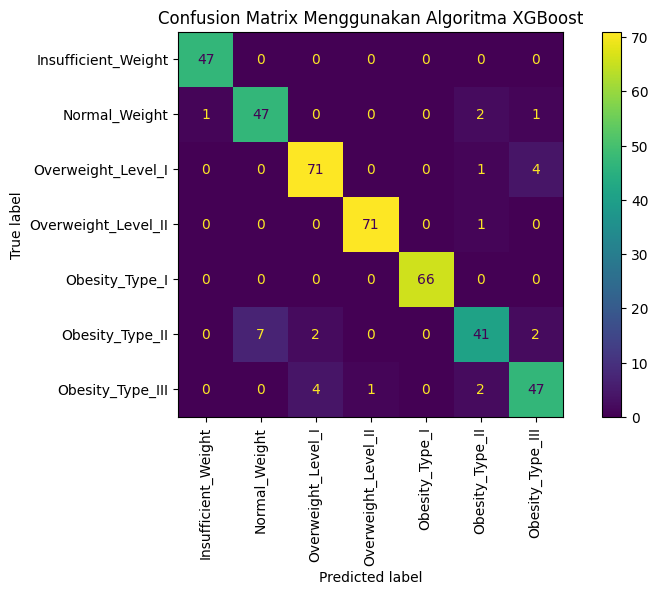

In [38]:
# Memanggil fungsi make_evaluation untuk menampilkan f1 score dan confusion matrix
make_evaluation(y_test, pred_xgb, title = f"Confusion Matrix Menggunakan Algoritma XGBoost")

Berdasarkan hasil di atas, diperoleh akurasi model XGBoost sebesar $0.933014$ atau $\approx 93.30\%$. Dari confusion matrix, model sedikit salah mengklasifikasi pada obesitas tingkat 2 dan tingkat 3.

## 2. Menggunakan Algoritma Support Vector Machine (SVM)

In [39]:
# Memanggil fungsi SVC dari library sklearn
model_svm = SVC(kernel = 'rbf', gamma = 'auto', random_state = 50)

# Melatih model SVM dengan data training pada X dan y
model_svm.fit(X_train, y_train)

SVC(gamma='auto', random_state=50)

In [40]:
# Memprediksi hasil menggunakan data testing berdasarkan model yang telat dilatih
pred_svm = model_svm.predict(X_test)

# Menampilkan akurasi model
svm = accuracy_score(y_test, pred_svm)
print(svm)

0.8492822966507177


                     precision    recall  f1-score   support

Insufficient_Weight       0.92      0.94      0.93        47
      Normal_Weight       0.63      0.65      0.64        51
 Overweight_Level_I       0.91      0.92      0.92        76
Overweight_Level_II       0.96      0.99      0.97        72
     Obesity_Type_I       0.98      0.98      0.98        66
    Obesity_Type_II       0.72      0.63      0.67        52
   Obesity_Type_III       0.71      0.72      0.72        54

           accuracy                           0.85       418
          macro avg       0.83      0.83      0.83       418
       weighted avg       0.85      0.85      0.85       418



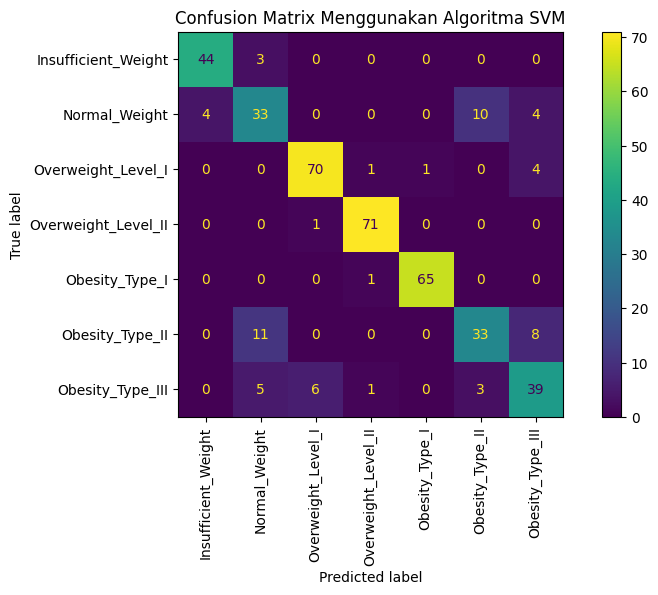

In [41]:
# Memanggil fungsi make_evaluation untuk menampilkan f1 score dan confusion matrix
make_evaluation(y_test, pred_svm, title = f"Confusion Matrix Menggunakan Algoritma SVM")

Berdasarkan hasil di atas, diperoleh akurasi model SVM sebesar $0.849282$ atau $\approx 84.3093\%$. Dari confusion matrix, model cukup banyak salah mengklasifikasi pada obesitas tingkat 2 dan tingkat 3.

## 3. Menggunakan Algoritma K-Nearest Neighbors (KNN)

In [42]:
# Memanggil fungsi KNeighborsClassifier dari library sklearn
model_knn = KNeighborsClassifier(n_neighbors = 3, leaf_size = 30)

# Melatih model KNN dengan data training pada X dan y
model_knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [43]:
# Memprediksi hasil menggunakan data testing berdasarkan model yang telat dilatih
pred_knn = model_knn.predict(X_test)

# Menampilkan akurasi model
knn = accuracy_score(y_test, pred_knn)
print(knn)

0.8899521531100478


                     precision    recall  f1-score   support

Insufficient_Weight       0.82      0.98      0.89        47
      Normal_Weight       0.86      0.49      0.62        51
 Overweight_Level_I       0.91      0.96      0.94        76
Overweight_Level_II       0.97      0.97      0.97        72
     Obesity_Type_I       0.99      1.00      0.99        66
    Obesity_Type_II       0.76      0.85      0.80        52
   Obesity_Type_III       0.86      0.89      0.87        54

           accuracy                           0.89       418
          macro avg       0.88      0.88      0.87       418
       weighted avg       0.89      0.89      0.88       418



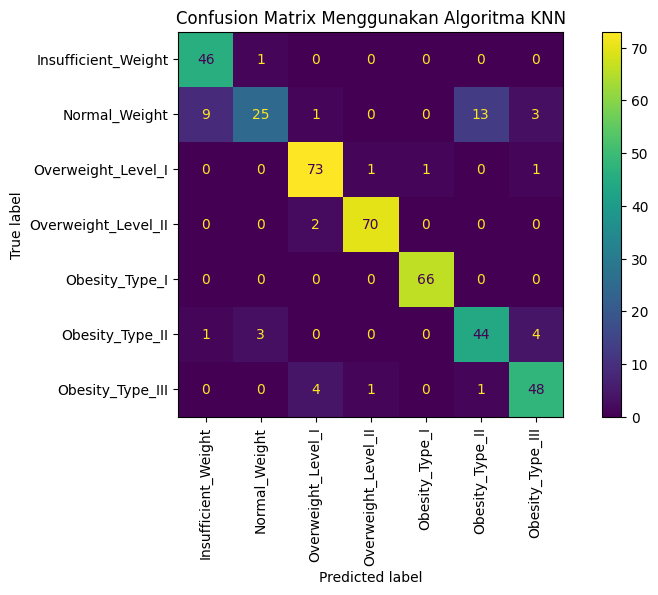

In [44]:
# Memanggil fungsi make_evaluation untuk menampilkan f1 score dan confusion matrix
make_evaluation(y_test, pred_knn, title = f"Confusion Matrix Menggunakan Algoritma KNN")

Berdasarkan hasil di atas, diperoleh akurasi model KNN sebesar $0.889952$ atau $\approx 89.00\%$. Dari confusion matrix, model banyak salah mengklasifikasi pada berat badan normal.

## 4. Menggunakan Algoritma Random Forest (RF)

In [45]:
# Memanggil fungsi RandomForestClassifier dari library sklearn
model_rf = RandomForestClassifier(n_estimators = 200, random_state = 50)

# Melatih model Random Forest dengan data training pada X dan y
model_rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=50)

In [46]:
# Memprediksi hasil menggunakan data testing berdasarkan model yang telat dilatih
pred_rf = model_rf.predict(X_test)

# Menampilkan akurasi model
rf = accuracy_score(y_test, pred_rf)
print(rf)

0.937799043062201


                     precision    recall  f1-score   support

Insufficient_Weight       1.00      0.91      0.96        47
      Normal_Weight       0.74      0.98      0.84        51
 Overweight_Level_I       0.96      0.96      0.96        76
Overweight_Level_II       1.00      0.99      0.99        72
     Obesity_Type_I       1.00      1.00      1.00        66
    Obesity_Type_II       0.98      0.79      0.87        52
   Obesity_Type_III       0.92      0.89      0.91        54

           accuracy                           0.94       418
          macro avg       0.94      0.93      0.93       418
       weighted avg       0.95      0.94      0.94       418



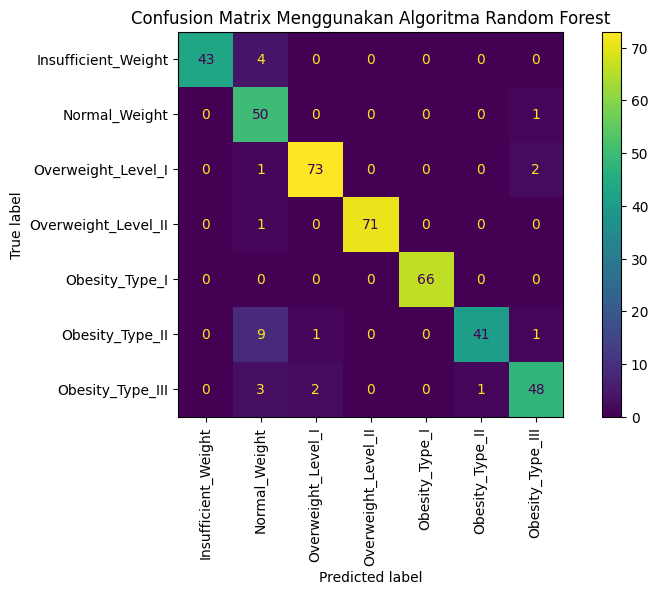

In [47]:
# Memanggil fungsi make_evaluation untuk menampilkan f1 score dan confusion matrix
make_evaluation(y_test, pred_rf, title = f"Confusion Matrix Menggunakan Algoritma Random Forest")

Berdasarkan hasil di atas, diperoleh akurasi model Random Forest sebesar $0.937799$ atau $\approx 93.78\%$. Dari confusion matrix, model sedikit salah mengklasifikasi pada obesitas tingkat 2 dan tingkat 3.

## 5. Menentukan Model Terbaik

Setelah dibentuk 4 model machine learning, selanjutnya akan ditentukan model terbaik dari keempat model tersebut.

In [48]:
# Membentuk DataFrame berisi model dengan akurasinya
models = pd.DataFrame({
    "Model": ["XGBoost", "SVM", "KNN", "Random Forest"],
    "Akurasi": [xgb, svm, knn, rf]
})

# Mengurutkan data berdasarkan akurasi dari tertinggi ke terendah
models.sort_values(by = "Akurasi", ascending = False)

,Model,Akurasi
3,Random Forest,0.937799
0,XGBoost,0.933014
2,KNN,0.889952
1,SVM,0.849282


Dari DataFrame di atas, dapat dilihat bahwa algoritma Random Forest memiliki akurasi terbaik yaitu $0.937799$ atau $\approx 93.78\%$, sementara algoritma SVM memiliki akurasi terendah yaitu $0.849282$ atau $\approx 84.93\%$. Meski belum sempurna 100%, namun model ini sudah bagus mendeteksi tingkat berat badan mengingat data yang digunakan masih sedikit serta sudah dapat mendeteksi tingkat berat badan pada golongan berat badan berlebih dan obesitas, yang mana ini menjadi permasalahan utama pada analisis ini.

Selanjutnya, dibentuk bar plot dari data tersebut untuk memvisualisasikan data.

<ipython-input-49-6748124d6e6a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(data = models, x = "Model", y = "Akurasi", palette = "viridis")


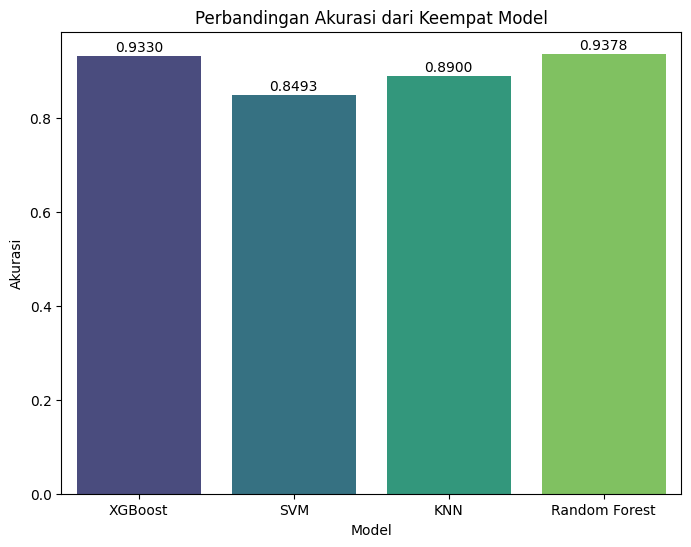

In [49]:
# Membentuk plot bar antara tingkat berat badan dengan usia
plt.figure(figsize = (8, 6))
barplot = sns.barplot(data = models, x = "Model", y = "Akurasi", palette = "viridis")

# Menambahkan label angka di atas bar plot pada masing-masing model
for index, value in enumerate(models["Akurasi"]):
    barplot.text(index, value + 0.01, f"{value:.4f}", color = "black", ha = "center")

# Menambahkan judul pada plot
plt.title("Perbandingan Akurasi dari Keempat Model")

# Menambahkan label sumbu x dan y pada plot
plt.xlabel("Model")
plt.ylabel("Akurasi")

# Menampilkan plot
plt.show()